# Train pre-trained ADAGE models on Staph epi data

### Georgia Doing 2022

This notebook walks through traineding pre-trained models on S. epi data
The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [1]:
import run_model_preT
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv
from AdageHyperModel import AdageHyperModel
import tensorflow as tf
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model_preT)
#reload(run_model)
#reload(Adage)

<module 'run_model_preT' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/run_model_preT.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



2266 239


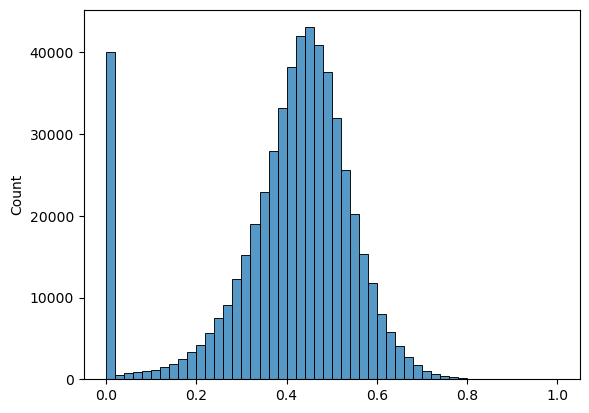

In [3]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/se16_log_counts_norm_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)
fig = sns.histplot(all_comp.flatten(), bins = 50)

In [6]:
tune_params0, hist0 = run_model_preT.tune_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',960)
tune_params1, hist1 = run_model_preT.tune_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',961)
tune_params2, hist2 = run_model_preT.tune_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',962)
tune_params3, hist3 = run_model_preT.tune_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',963)
tune_params4, hist4 = run_model_preT.tune_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',964)

Trial 90 Complete [00h 00m 02s]
val_loss: 1973.8837890625

Best val_loss So Far: 0.7372670769691467
Total elapsed time: 00h 01m 09s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in hyperband_search_dir/adage_tuner
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0050 summary
Hyperparameters:
units: 10
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.7000000000000001
al2: 0.1
lr: 0.041
bs: 20
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.7372670769691467

Trial 0046 summary
Hyperparameters:
units: 10
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.7000000000000001
al2: 0.1
lr: 0.041
bs: 20
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.767890989780426

Trial 0034 summary
Hyperparameters:
units: 10
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.7000000000000001
al2: 0.1
lr: 0.041
bs: 20
tuner/epo

In [7]:
#print(len(hist.history['loss']))

hist0.results_summary()
hist1.results_summary()
#model = tuner.hypermodel.build(best_hps[0])
#hist  = tuner.hypermodel.fit(best_hps[0], model) 



Results summary
Results in hyperband_search_dir/adage_tuner
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0050 summary
Hyperparameters:
units: 50
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.2
lr: 0.081
bs: 20
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.6859245896339417

Trial 0046 summary
Hyperparameters:
units: 50
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.2
lr: 0.081
bs: 20
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.6879963874816895

Trial 0034 summary
Hyperparameters:
units: 50
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.2
lr: 0.081
bs: 20
tuner/epochs: 6
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0007
Score: 0.6887444853782654

Trial 0007 summary
Hyperparameters:
units: 50
act1: relu
shuffle: False
init: glorot_normal
kl1: 0.0
kl2

In [69]:
for p in tune_params0:
    print(p.values)

{'units': 100, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_uniform', 'kl1': 0.0, 'kl2': 0.8, 'al2': 0.4, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'units': 30, 'act1': 'sigmoid', 'shuffle': False, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.5, 'lr': 0.001, 'bs': 50, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0077'}
{'units': 30, 'act1': 'sigmoid', 'shuffle': False, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.5, 'lr': 0.001, 'bs': 50, 'tuner/epochs': 17, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'units': 40, 'act1': 'sigmoid', 'shuffle': False, 'init': 'glorot_uniform', 'kl1': 0.0, 'kl2': 0.7000000000000001, 'al2': 0.7000000000000001, 'lr': 0.011, 'bs': 20, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
{'units': 40, 'act1': 'sigmoid', 'shuffle

In [ ]:
#print(tune_params[0].values)
#print(tune_params[1].values)
for i in range(10):
   print(tune_params[i].values) 
print(tune_params[89].values)
ahm = AdageHyperModel(gene_num)
model = ahm.build(tune_params[0])
#hist = ahm.fit(tune_params[0],model)
#print(hist)


{'units': 90, 'act1': 'relu', 'shuffle': False, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.7000000000000001, 'al2': 0.1, 'lr': 0.001, 'bs': 10, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0076'}
{'units': 90, 'act1': 'relu', 'shuffle': False, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.7000000000000001, 'al2': 0.1, 'lr': 0.001, 'bs': 10, 'tuner/epochs': 17, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'units': 80, 'act1': 'sigmoid', 'shuffle': False, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.4, 'al2': 0.2, 'lr': 0.041, 'bs': 20, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
{'units': 60, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.30000000000000004, 'al2': 0.8, 'lr': 0.011, 'bs': 40, 'tuner/epochs': 6, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'units': 70, 'act1': 'sigmoid', 's

In [8]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp, seq_temp2 = run_model_preT.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               960, enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
arr_temp, arr_temp2 = run_model_preT.run_model('../data_files/train_set_normalized.csv',
                                               '../data_files/train_set_normalized.csv',
                                               960,enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

updated22
Epoch 1/10
22/22 [==============================] - 0s 6ms/step - loss: 0.7009 - val_loss: 0.6986
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6968 - val_loss: 0.6947
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6934 - val_loss: 0.6919
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6910 - val_loss: 0.6900
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6893 - val_loss: 0.6887
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6880 - val_loss: 0.6876
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6870 - val_loss: 0.6867
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6861 - val_loss: 0.6859
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6853 - val_loss: 0.6852
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6844 - val_loss: 0.6844
(2,)
(2,)

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 7ms/step - loss: 0.6838 - val_loss: 0.6839
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6831 - val_loss: 0.6831
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6823 - val_loss: 0.6823
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6814 - val_loss: 0.6815
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6807
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6796 - val_loss: 0.6798
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6787 - val_loss: 0.6789
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6777 - val_loss: 0.6780
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6767 - val_loss: 0.6771
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6758 - val_loss: 0.6762
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2,)
(2,)
(2,)
Epoch 1/10


/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


86/86 [==============================] - 1s 5ms/step - loss: 0.6701 - val_loss: 0.6724
Epoch 2/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6677 - val_loss: 0.6705
Epoch 3/10
86/86 [==============================] - 0s 6ms/step - loss: 0.6655 - val_loss: 0.6687
Epoch 4/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6634 - val_loss: 0.6671
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6615 - val_loss: 0.6657
Epoch 6/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6645
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6582 - val_loss: 0.6634
Epoch 8/10
86/86 [==============================] - 0s 6ms/step - loss: 0.6568 - val_loss: 0.6625
Epoch 9/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6556 - val_loss: 0.6617
Epoch 10/10
86/86 [==============================] - 1s 6ms/step - loss: 0.6545 - val_loss: 0.6610
Epoch 1/100
86/86 [===========

(5549, 600)

In [9]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dict2 = {
    "tf_adage": tf_adage
}

model_dict_pre = {
    "tf_adage": tf_adage
}

model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/se_MAPPED_sa_NCTC3825_filt_norm_log_01.csv',
                                                              '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl1=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_pre[name] = mseqpre
                    model_dict_seq2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue571
updated22
Epoch 1/10
194/194 [==============================] - 1s 2ms/step - loss: 0.6320 - val_loss: 0.5509
Epoch 2/10
194/194 [==============================] - 0s 1ms/step - loss: 0.5090 - val_loss: 0.4831
Epoch 3/10
194/194 [==============================] - 0s 1ms/step - loss: 0.4722 - val_loss: 0.4637
Epoch 4/10
194/194 [==============================] - 0s 2ms/step - loss: 0.4587 - val_loss: 0.4537
Epoch 5/10
194/194 [==============================] - 0s 2ms/step - loss: 0.4501 - val_loss: 0.4457
Epoch 6/10
194/194 [==============================] - 0s 1ms/step - loss: 0.4402 - val_loss: 0.4311
Epoch 7/10
194/194 [==============================] - 0s 1ms/step - loss: 0.4206 - val_loss: 0.4107
Epoch 8/10
194/194 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.4033
Epoch 9/10
194/194 [==============================] - 0s 1ms/step - loss: 0.4027 - val_loss: 0.4009
Epoch 10/10
194/194 [=============================

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 4ms/step - loss: 0.9934 - val_loss: 0.9403
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8907 - val_loss: 0.8401
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8042 - val_loss: 0.7701
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7466 - val_loss: 0.7256
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7107 - val_loss: 0.6983
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6889 - val_loss: 0.6818
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6756 - val_loss: 0.6718
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6676 - val_loss: 0.6655
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6625 - val_loss: 0.6615
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6591 - val_loss: 0.6588
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.8028 - val_loss: 0.7657
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7381 - val_loss: 0.7135
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7011 - val_loss: 0.6908
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6858 - val_loss: 0.6816
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6794 - val_loss: 0.6775
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6762 - val_loss: 0.6751
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6742 - val_loss: 0.6735
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6727 - val_loss: 0.6720
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6712 - val_loss: 0.6706
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6697 - val_loss: 0.6692
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.7221 - val_loss: 0.7123
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7006 - val_loss: 0.6894
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6751 - val_loss: 0.6619
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6468 - val_loss: 0.6385
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6301 - val_loss: 0.6311
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6264 - val_loss: 0.6303
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6257 - val_loss: 0.6300
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6254 - val_loss: 0.6296
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6252 - val_loss: 0.6297
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6251 - val_loss: 0.6298
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.9796 - val_loss: 0.9326
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8891 - val_loss: 0.8451
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8135 - val_loss: 0.7842
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7630 - val_loss: 0.7447
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7305 - val_loss: 0.7194
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7096 - val_loss: 0.7029
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6958 - val_loss: 0.6919
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6864 - val_loss: 0.6842
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6797 - val_loss: 0.6787
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6748 - val_loss: 0.6745
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.7874 - val_loss: 0.7682
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7528 - val_loss: 0.7382
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7296 - val_loss: 0.7218
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7172 - val_loss: 0.7130
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7104 - val_loss: 0.7080
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7062 - val_loss: 0.7047
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7034 - val_loss: 0.7024
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7012 - val_loss: 0.7004
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6993 - val_loss: 0.6986
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6976 - val_loss: 0.6969
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.7379 - val_loss: 0.7289
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7191 - val_loss: 0.7093
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6952 - val_loss: 0.6786
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6651 - val_loss: 0.6600
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6539 - val_loss: 0.6559
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6515 - val_loss: 0.6550
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6507 - val_loss: 0.6543
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6501 - val_loss: 0.6543
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6497 - val_loss: 0.6539
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6494 - val_loss: 0.6537
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 4ms/step - loss: 0.9914 - val_loss: 0.9383
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8891 - val_loss: 0.8388
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8031 - val_loss: 0.7693
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7460 - val_loss: 0.7251
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7104 - val_loss: 0.6980
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6887 - val_loss: 0.6817
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6756 - val_loss: 0.6717
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6676 - val_loss: 0.6655
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6625 - val_loss: 0.6616
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6592 - val_loss: 0.6589
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 6ms/step - loss: 0.8055 - val_loss: 0.7677
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7396 - val_loss: 0.7145
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7019 - val_loss: 0.6913
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6862 - val_loss: 0.6819
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6796 - val_loss: 0.6777
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6765 - val_loss: 0.6754
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6746 - val_loss: 0.6738
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6730 - val_loss: 0.6724
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6717 - val_loss: 0.6711
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6703 - val_loss: 0.6698
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 4ms/step - loss: 0.7221 - val_loss: 0.7122
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7012 - val_loss: 0.6904
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6779 - val_loss: 0.6651
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6510 - val_loss: 0.6410
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6321 - val_loss: 0.6316
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6268 - val_loss: 0.6303
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6259 - val_loss: 0.6300
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6255 - val_loss: 0.6299
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6253 - val_loss: 0.6297
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6251 - val_loss: 0.6297
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.9828 - val_loss: 0.9355
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8916 - val_loss: 0.8472
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.8154 - val_loss: 0.7858
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7644 - val_loss: 0.7459
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7316 - val_loss: 0.7203
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7104 - val_loss: 0.7037
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6964 - val_loss: 0.6924
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6869 - val_loss: 0.6847
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6801 - val_loss: 0.6791
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6751 - val_loss: 0.6748
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.7928 - val_loss: 0.7729
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7569 - val_loss: 0.7417
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7327 - val_loss: 0.7246
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7198 - val_loss: 0.7155
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7128 - val_loss: 0.7104
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7088 - val_loss: 0.7073
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7061 - val_loss: 0.7051
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7041 - val_loss: 0.7034
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7025 - val_loss: 0.7019
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7010 - val_loss: 0.7004
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.7389 - val_loss: 0.7296
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7200 - val_loss: 0.7106
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6984 - val_loss: 0.6837
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6691 - val_loss: 0.6625
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6555 - val_loss: 0.6564
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6523 - val_loss: 0.6557
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6513 - val_loss: 0.6551
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6507 - val_loss: 0.6549
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6503 - val_loss: 0.6544
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6500 - val_loss: 0.6543
Epoch 1/100
22/22 [===========

In [10]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dictSE = {
    "tf_adage": tf_adage
}

model_dictSA = {
    "tf_adage": tf_adage
}



for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqSE = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl1=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=10,
                                               init=i,
                                               lr = 0.1)
                    mseqSA = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl1=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=10,
                                               init=i,
                                               lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dictSE[name] = mseqSE
                    model_dictSA[name] = mseqSA

ad_glorot_uniform_0_sigmoid_tiedTrue571


Epoch 1/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6938 - val_loss: 0.6926
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6912 - val_loss: 0.6903
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6891 - val_loss: 0.6883
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6868 - val_loss: 0.6859
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6838 - val_loss: 0.6828
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6802 - val_loss: 0.6791
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6760 - val_loss: 0.6750
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6717 - val_loss: 0.6710
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6675 - val_loss: 0.6671
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6636 - val_loss: 0.6636
Epoch 1/10
194/194 

In [11]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dict_preCTRL = {
    "tf_adage": tf_adage
}

model_dict_seq2CTRL = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl1=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_preCTRL[name] = mseqpre
                    model_dict_seq2CTRL[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue571
updated22
Epoch 1/10
22/22 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6915
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6903 - val_loss: 0.6890
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6877 - val_loss: 0.6865
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6849 - val_loss: 0.6834
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6813 - val_loss: 0.6797
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6772 - val_loss: 0.6757
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6728 - val_loss: 0.6715
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6685 - val_loss: 0.6677
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6645 - val_loss: 0.6641
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - 

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 6ms/step - loss: 0.6584 - val_loss: 0.6591
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6559 - val_loss: 0.6567
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6534 - val_loss: 0.6545
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6511 - val_loss: 0.6525
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6491 - val_loss: 0.6509
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6474 - val_loss: 0.6494
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6460 - val_loss: 0.6482
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6447 - val_loss: 0.6472
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6436 - val_loss: 0.6463
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6426 - val_loss: 0.6455
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6552 - val_loss: 0.6565
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6529 - val_loss: 0.6542
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6506 - val_loss: 0.6522
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6486 - val_loss: 0.6506
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6470 - val_loss: 0.6492
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6456 - val_loss: 0.6480
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6444 - val_loss: 0.6470
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6434 - val_loss: 0.6462
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6425 - val_loss: 0.6455
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6418 - val_loss: 0.6449
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 6ms/step - loss: 0.6438 - val_loss: 0.6472
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6429 - val_loss: 0.6465
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6420 - val_loss: 0.6457
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6414 - val_loss: 0.6452
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6408 - val_loss: 0.6448
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6403 - val_loss: 0.6444
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6400 - val_loss: 0.6441
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6396 - val_loss: 0.6438
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6393 - val_loss: 0.6436
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6391 - val_loss: 0.6434
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6864 - val_loss: 0.6868
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6838 - val_loss: 0.6843
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6811 - val_loss: 0.6819
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6787 - val_loss: 0.6799
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6766 - val_loss: 0.6781
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6748 - val_loss: 0.6766
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6733 - val_loss: 0.6753
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6719 - val_loss: 0.6742
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6707 - val_loss: 0.6732
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6696 - val_loss: 0.6723
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6835 - val_loss: 0.6844
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6811 - val_loss: 0.6820
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6786 - val_loss: 0.6799
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6765 - val_loss: 0.6781
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6746 - val_loss: 0.6765
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6731 - val_loss: 0.6752
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6718 - val_loss: 0.6741
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6706 - val_loss: 0.6731
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6696 - val_loss: 0.6723
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6687 - val_loss: 0.6716
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6710 - val_loss: 0.6743
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6700 - val_loss: 0.6734
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6690 - val_loss: 0.6726
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6681 - val_loss: 0.6720
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6674 - val_loss: 0.6714
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6668 - val_loss: 0.6708
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6662 - val_loss: 0.6703
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6657 - val_loss: 0.6699
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6653 - val_loss: 0.6695
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6648 - val_loss: 0.6691
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6584 - val_loss: 0.6592
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6559 - val_loss: 0.6567
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6533 - val_loss: 0.6545
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6510 - val_loss: 0.6525
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6491 - val_loss: 0.6508
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6474 - val_loss: 0.6494
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6459 - val_loss: 0.6482
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6446 - val_loss: 0.6471
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6435 - val_loss: 0.6462
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6426 - val_loss: 0.6454
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 6ms/step - loss: 0.6559 - val_loss: 0.6570
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6535 - val_loss: 0.6547
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6511 - val_loss: 0.6526
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6490 - val_loss: 0.6508
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6473 - val_loss: 0.6494
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6458 - val_loss: 0.6482
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6446 - val_loss: 0.6471
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6435 - val_loss: 0.6463
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6426 - val_loss: 0.6455
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6419 - val_loss: 0.6449
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 4ms/step - loss: 0.6450 - val_loss: 0.6484
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6438 - val_loss: 0.6473
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6427 - val_loss: 0.6464
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6419 - val_loss: 0.6458
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6412 - val_loss: 0.6451
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6407 - val_loss: 0.6448
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6402 - val_loss: 0.6444
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6399 - val_loss: 0.6441
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6396 - val_loss: 0.6438
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 0.6393 - val_loss: 0.6436
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6857 - val_loss: 0.6867
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6831 - val_loss: 0.6841
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6804 - val_loss: 0.6816
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6780 - val_loss: 0.6796
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6759 - val_loss: 0.6778
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6741 - val_loss: 0.6762
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6725 - val_loss: 0.6748
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6711 - val_loss: 0.6737
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6699 - val_loss: 0.6726
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6689 - val_loss: 0.6717
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6823 - val_loss: 0.6833
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6799 - val_loss: 0.6809
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6775 - val_loss: 0.6788
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6754 - val_loss: 0.6770
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6736 - val_loss: 0.6755
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.6742
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6707 - val_loss: 0.6731
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6696 - val_loss: 0.6721
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6686 - val_loss: 0.6713
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6677 - val_loss: 0.6706
Epoch 1/100
22/22 [===========

/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/Users/doingg/opt/miniconda3/envs/tfk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


22/22 [==============================] - 0s 5ms/step - loss: 0.6698 - val_loss: 0.6733
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6687 - val_loss: 0.6723
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6677 - val_loss: 0.6715
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6668 - val_loss: 0.6707
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6661 - val_loss: 0.6702
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6655 - val_loss: 0.6695
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6649 - val_loss: 0.6691
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6644 - val_loss: 0.6686
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6640 - val_loss: 0.6681
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6635 - val_loss: 0.6677
Epoch 1/100
22/22 [===========

[Text(0.5, 1.0, 'tf_adage')]

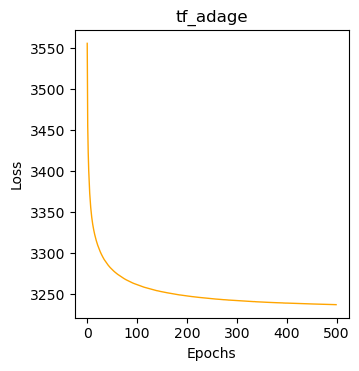

In [12]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict_seq2[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



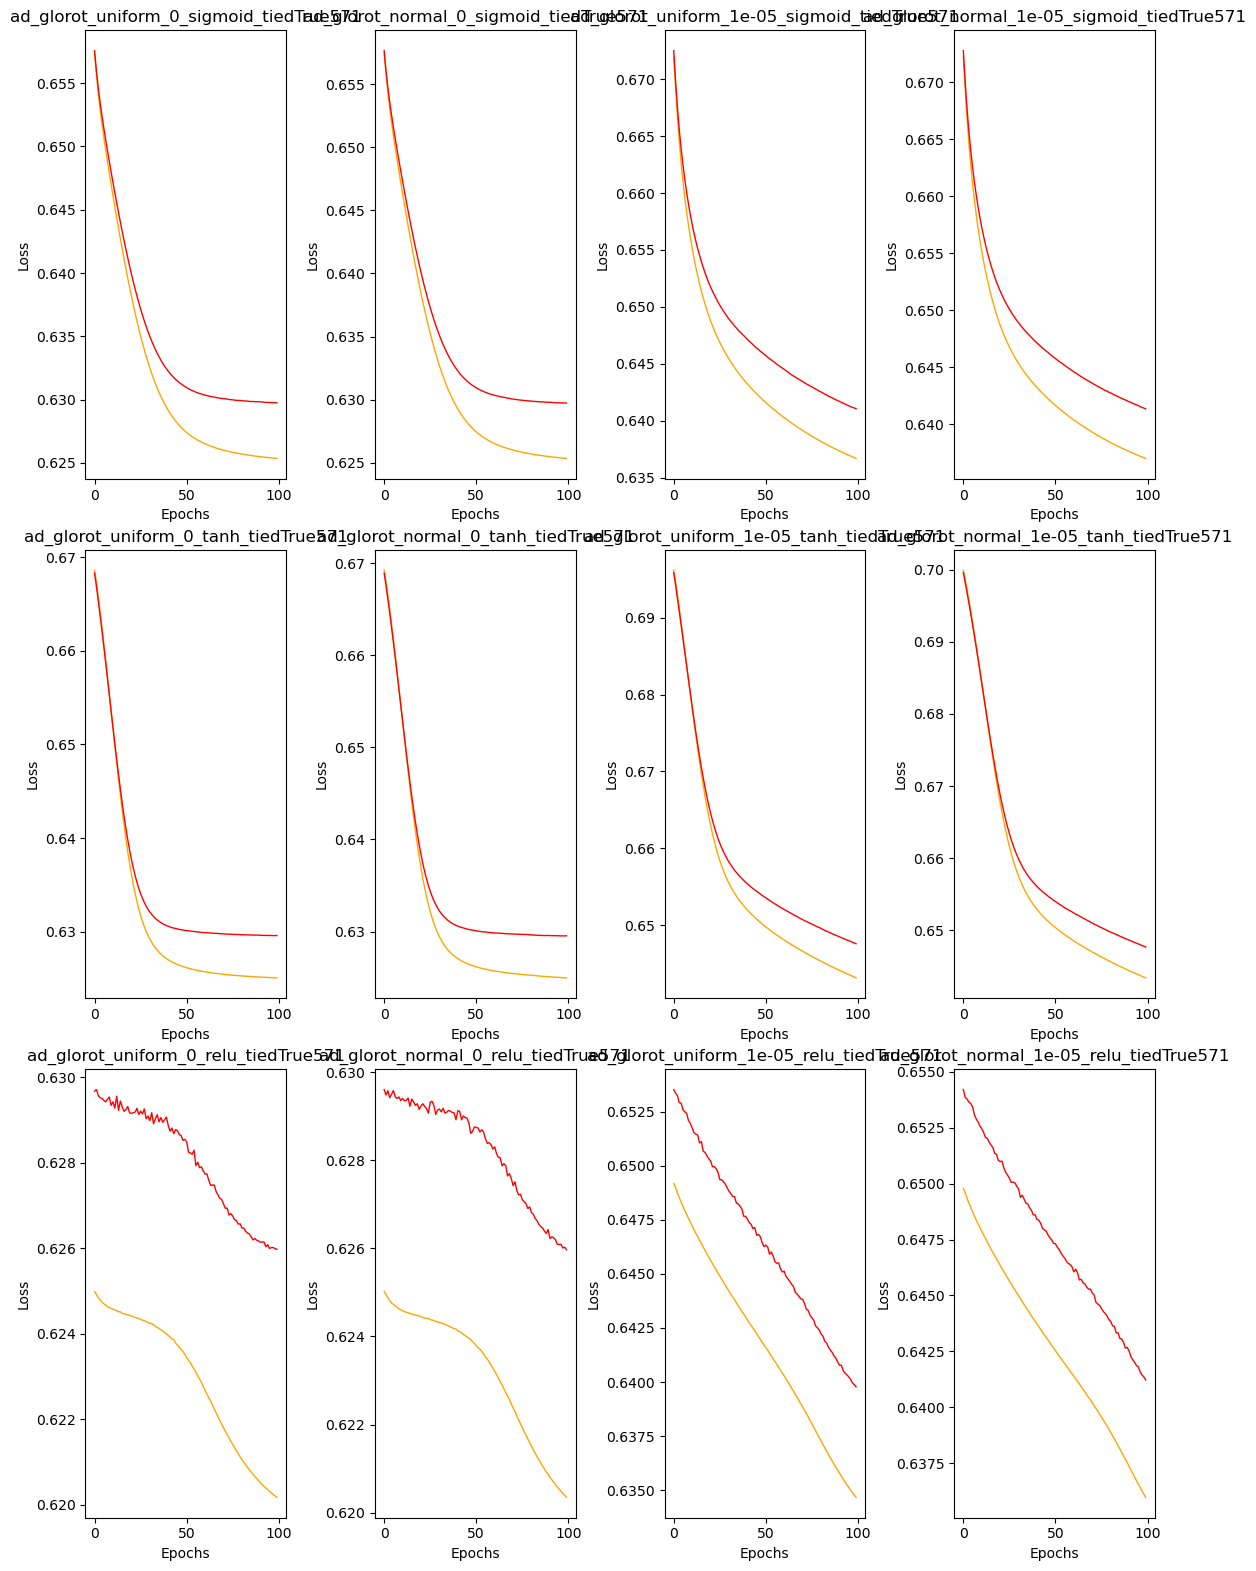

In [13]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,100)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,100)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

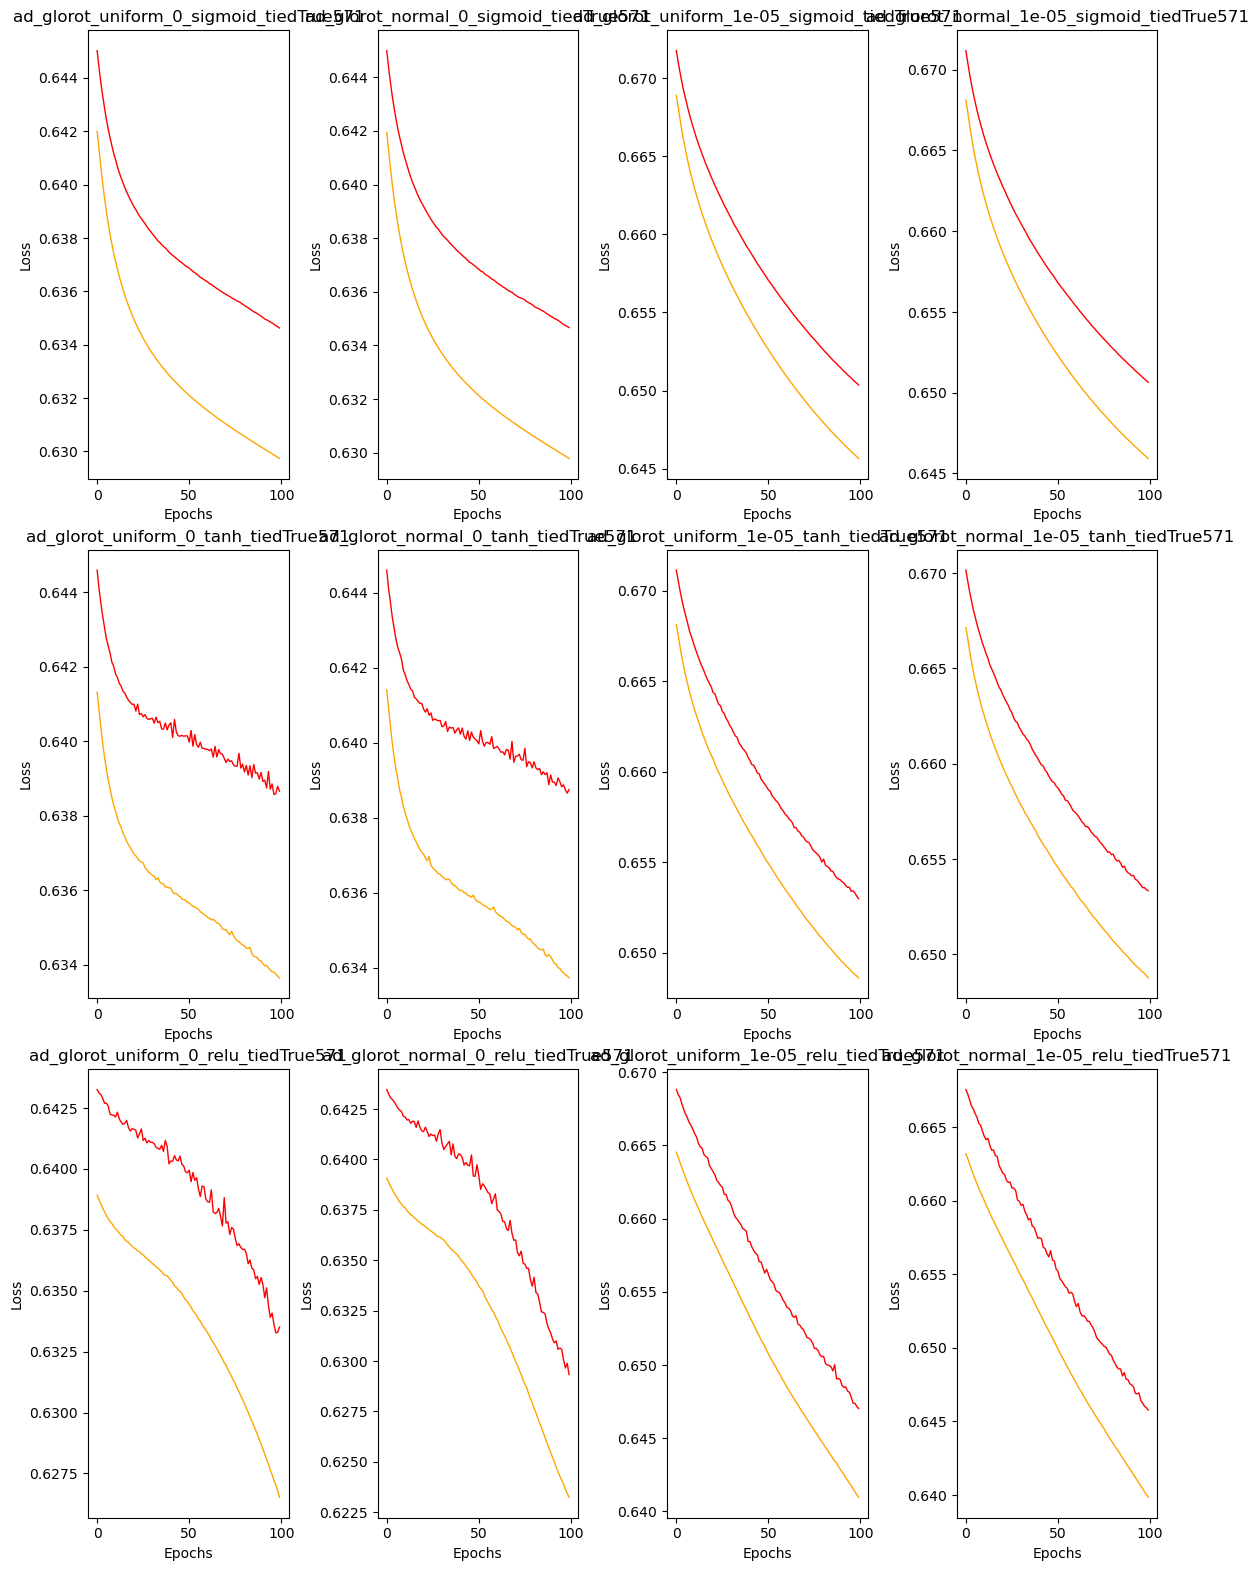

In [14]:
model_dict = model_dict_seq2CTRL

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,100)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,100)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

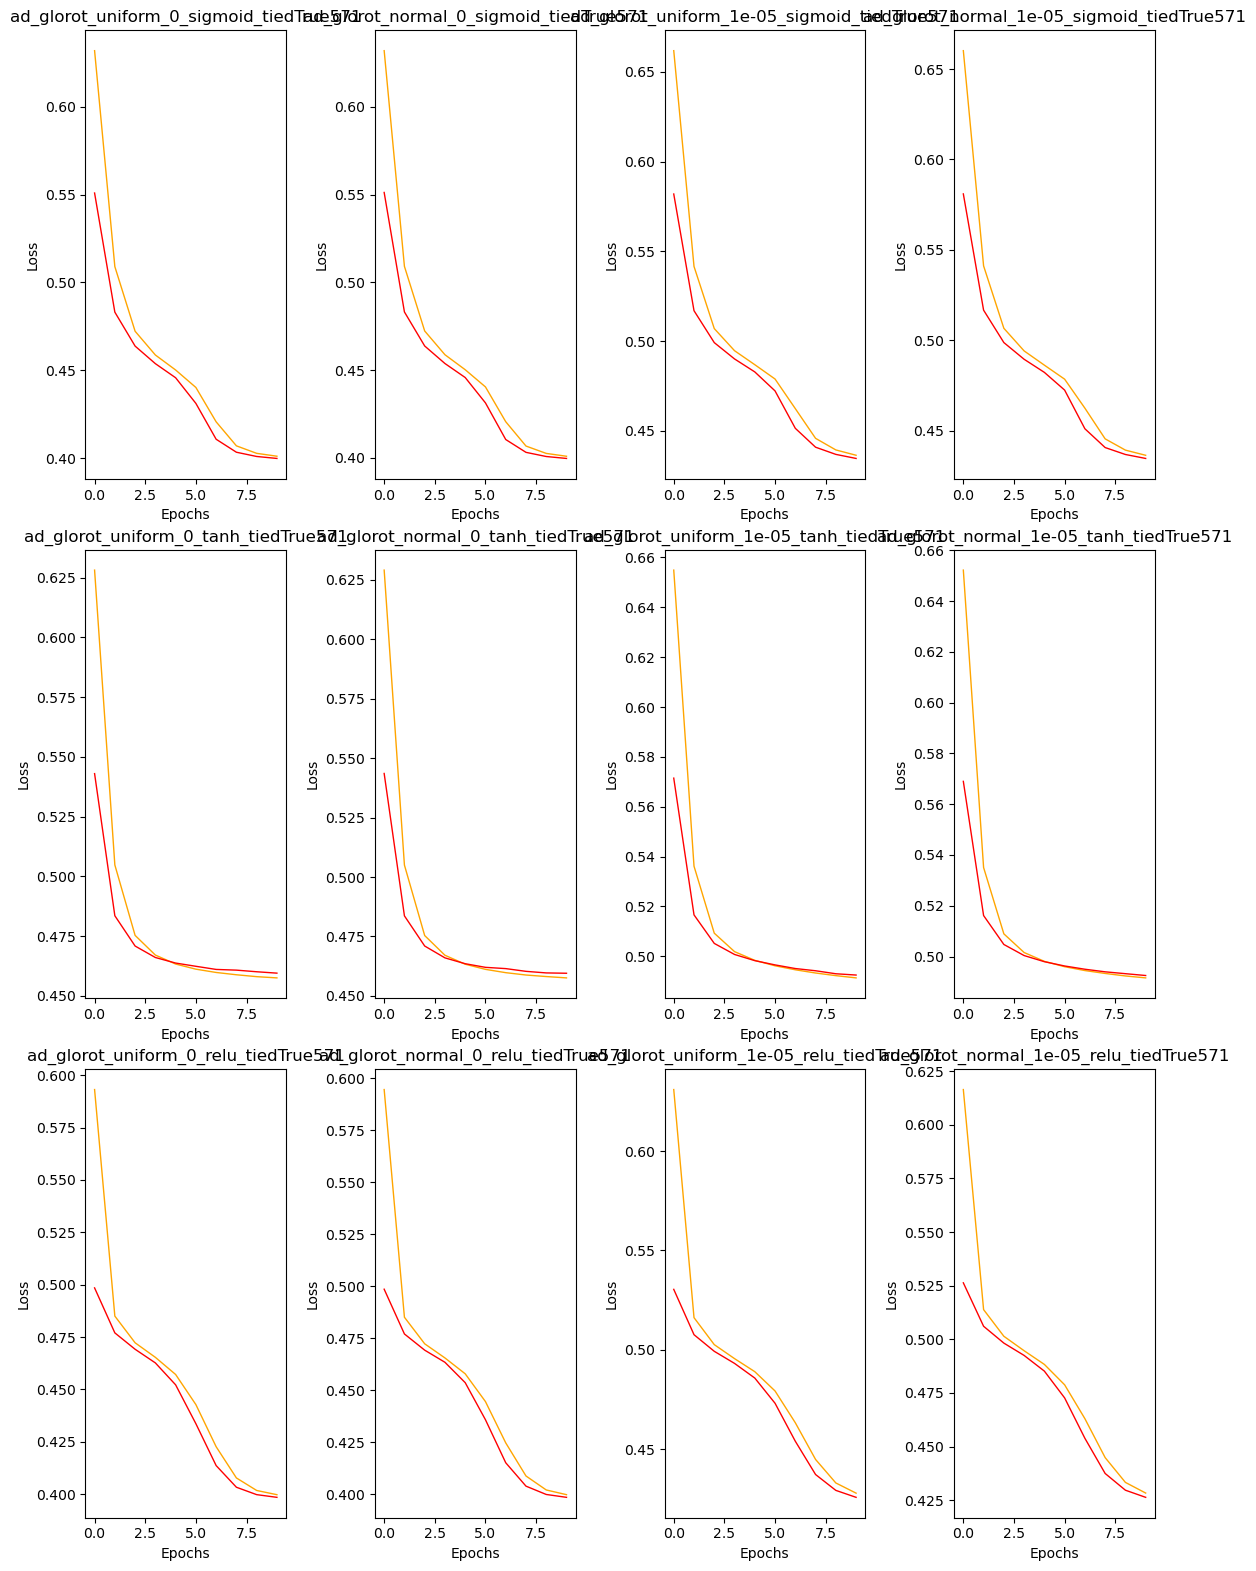

In [15]:
model_dict = model_dict_pre

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

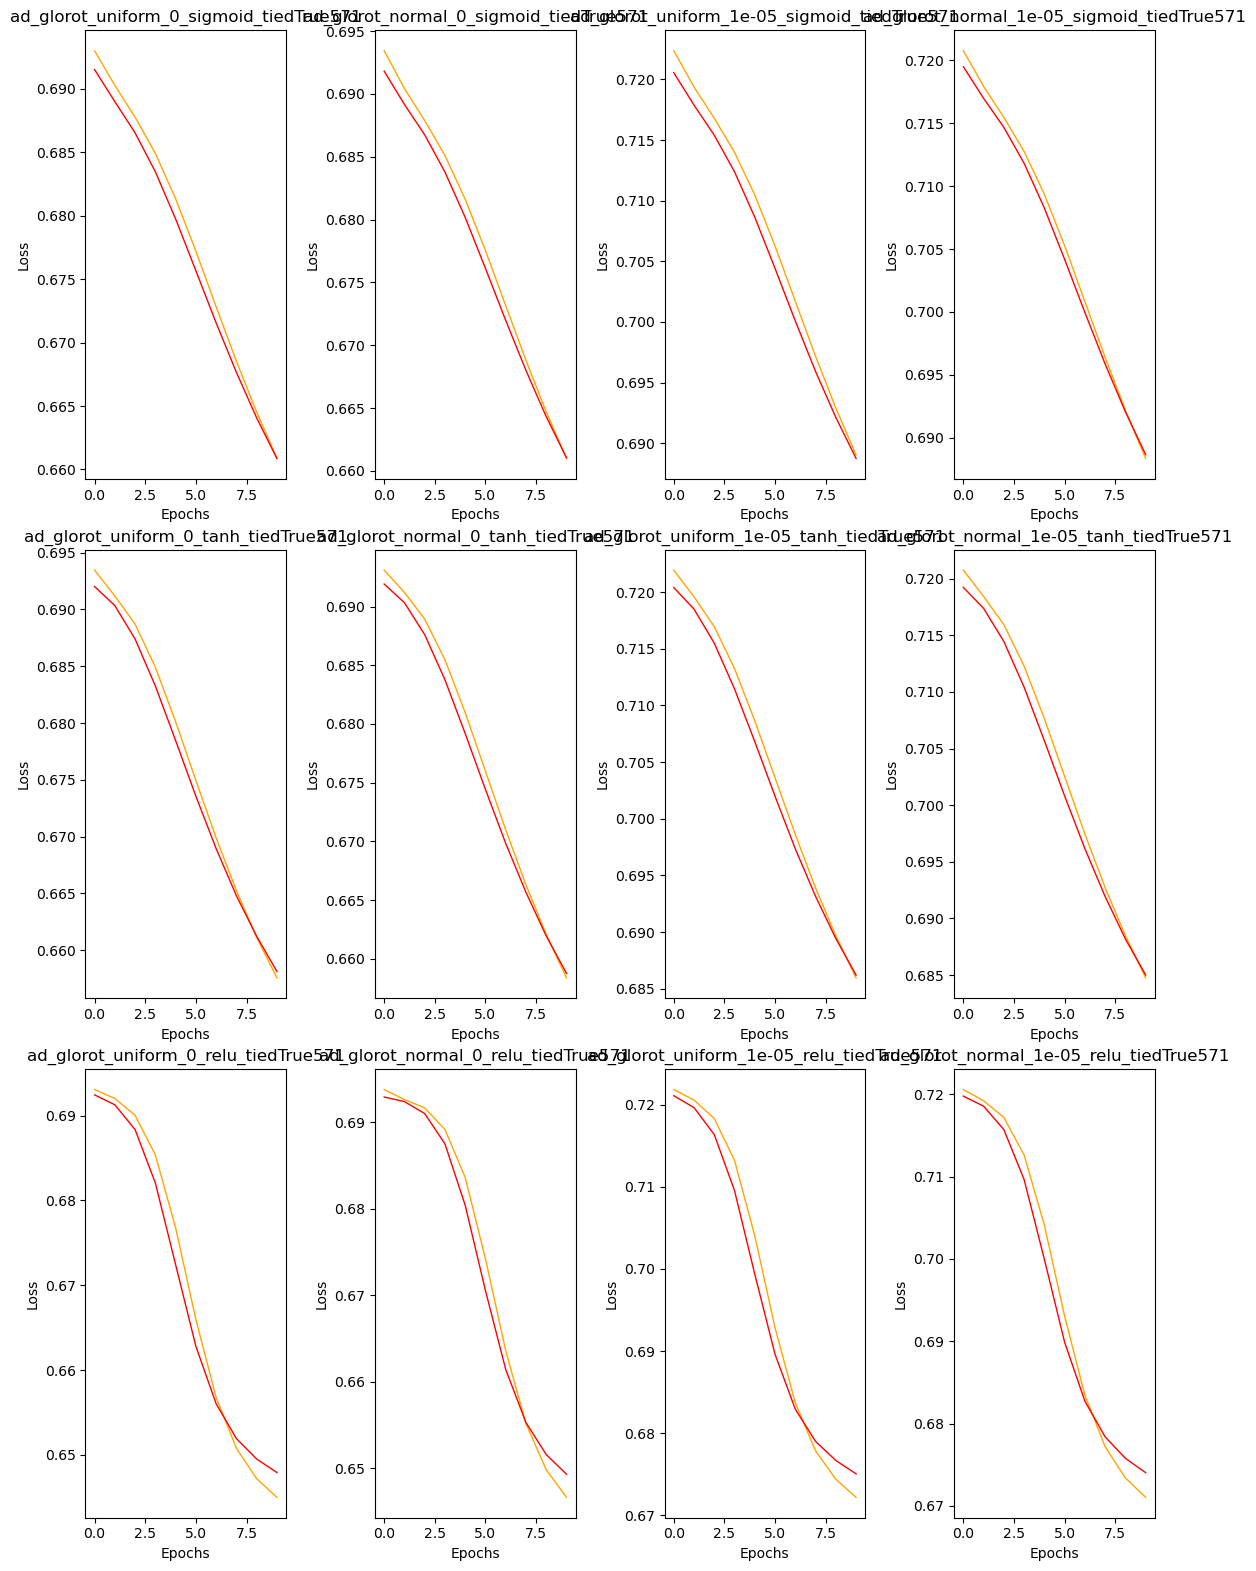

In [16]:
model_dict = model_dict_preCTRL

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

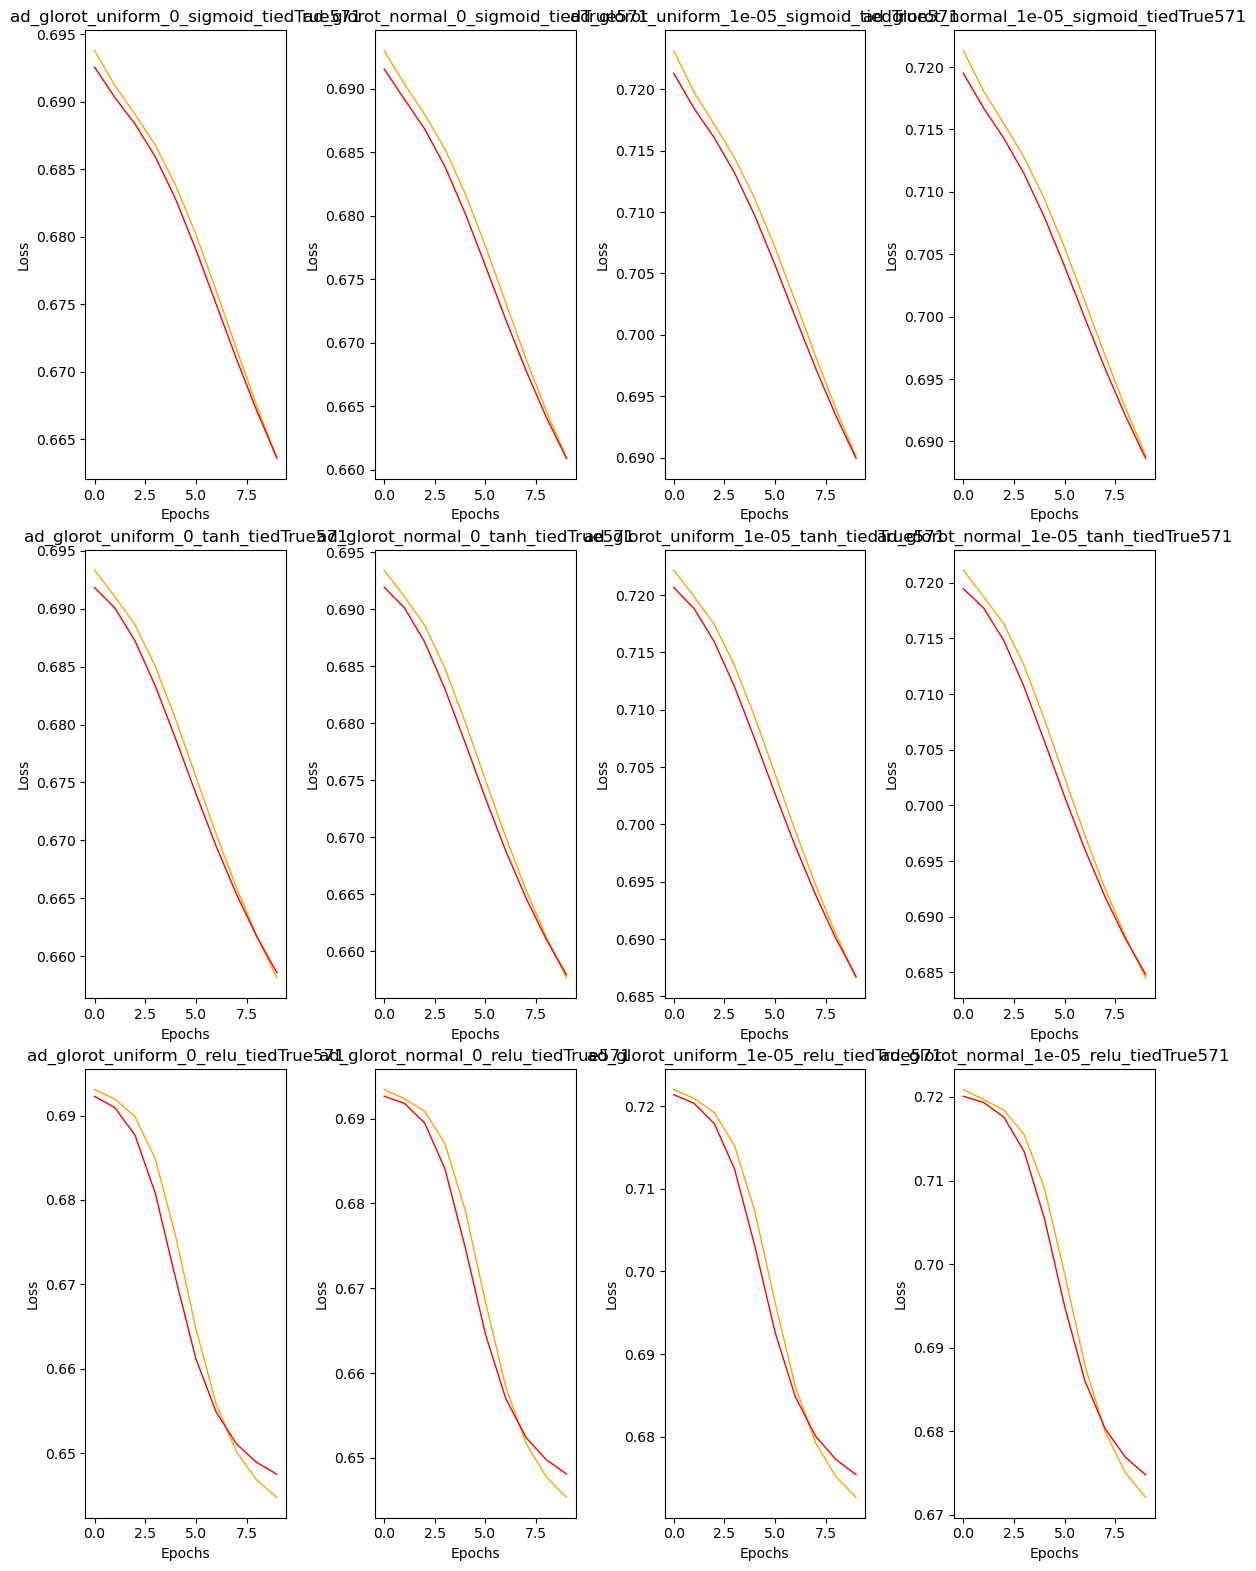

In [17]:
model_dict = model_dictSE

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

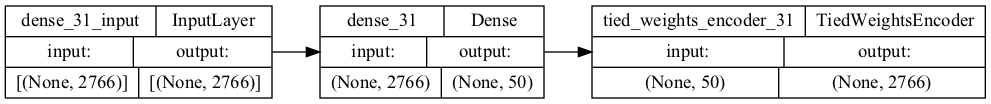

In [53]:
model_dict = model_dictSA
model_temp = model_dict['ad_glorot_uniform_0_sigmoid_tiedTrue571']

tf.keras.utils.plot_model(model_temp.autoencoder, show_shapes=True, rankdir="LR")

In [65]:
comp = model_temp.compendium
print(np.transpose(comp).shape)
x_train2, x_train2_noisy = run_model_preT.prep_data(comp, 571)
print(x_train2.shape, x_train2_noisy.shape)
ae = model_temp.autoencoder 
print(ae)
results = ae.evaluate(x_train2_noisy, x_train2)
print(results)
x_t_both = np.concatenate((x_train2_noisy, x_train2))
print(x_t_both.shape)
predictions = ae.predict(x_t_both)
print(predictions.shape)
print(x_train2[0,0])
print(predictions[0,0])
#print("Accuracy", results[1])

(2153, 2766)
(2153, 2766) (2153, 2766)
68/68 [==============================] - 0s 1ms/step - loss: 0.5933
0.593313455581665
(4306, 2766)
135/135 [==============================] - 0s 767us/step
(4306, 2766)
0.0
0.2139921


In [68]:
#explainer = shap.KernelExplainer(ae, x_t_both[:5,:])
#shap_values = explainer.shap_values(x_t_both[0,:], nsamples = 2767)
#shap.force_plot(explainer.expected_value, shap_values[0], x_train2[20,:])

KeyboardInterrupt: 

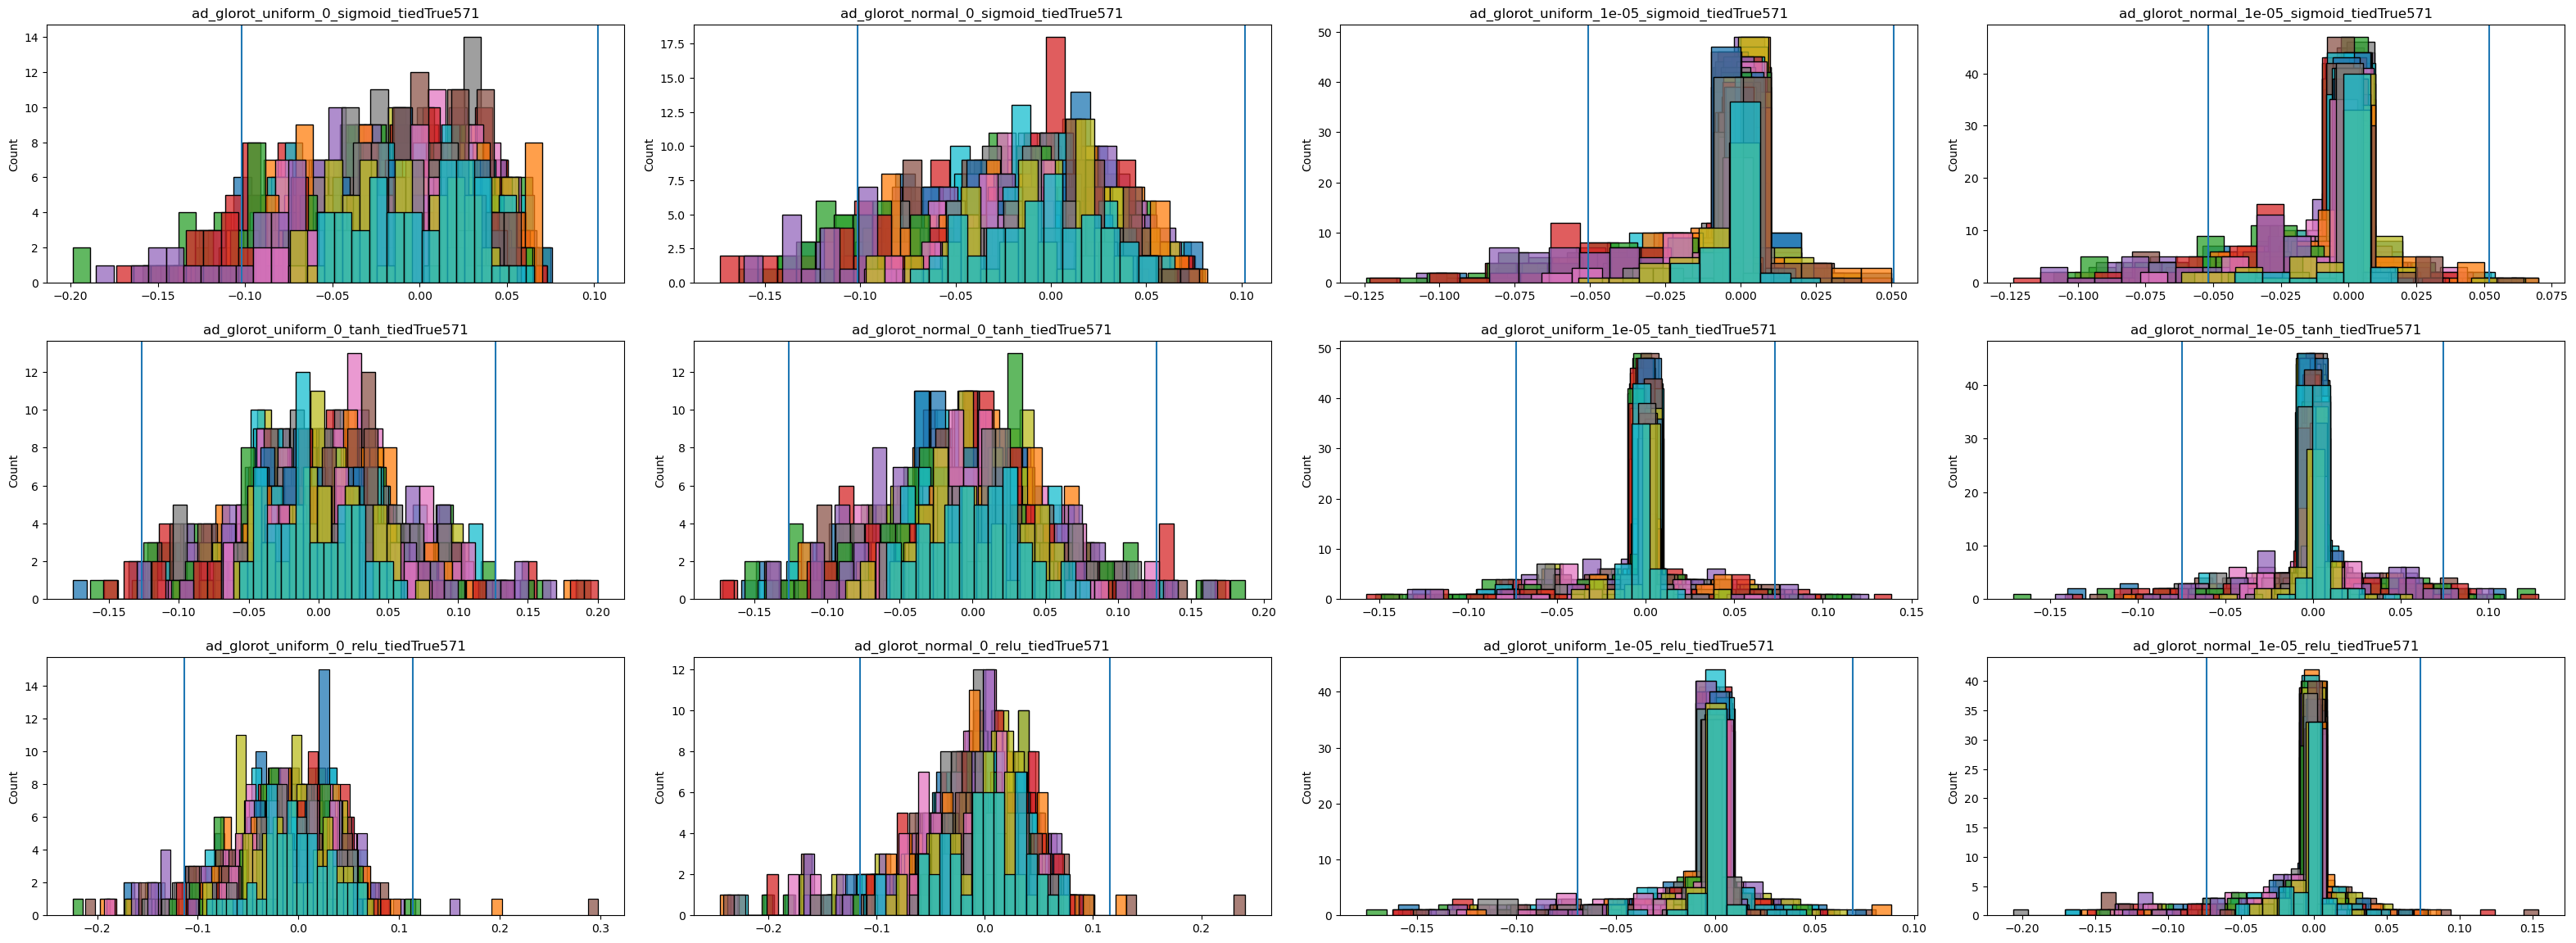

In [34]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


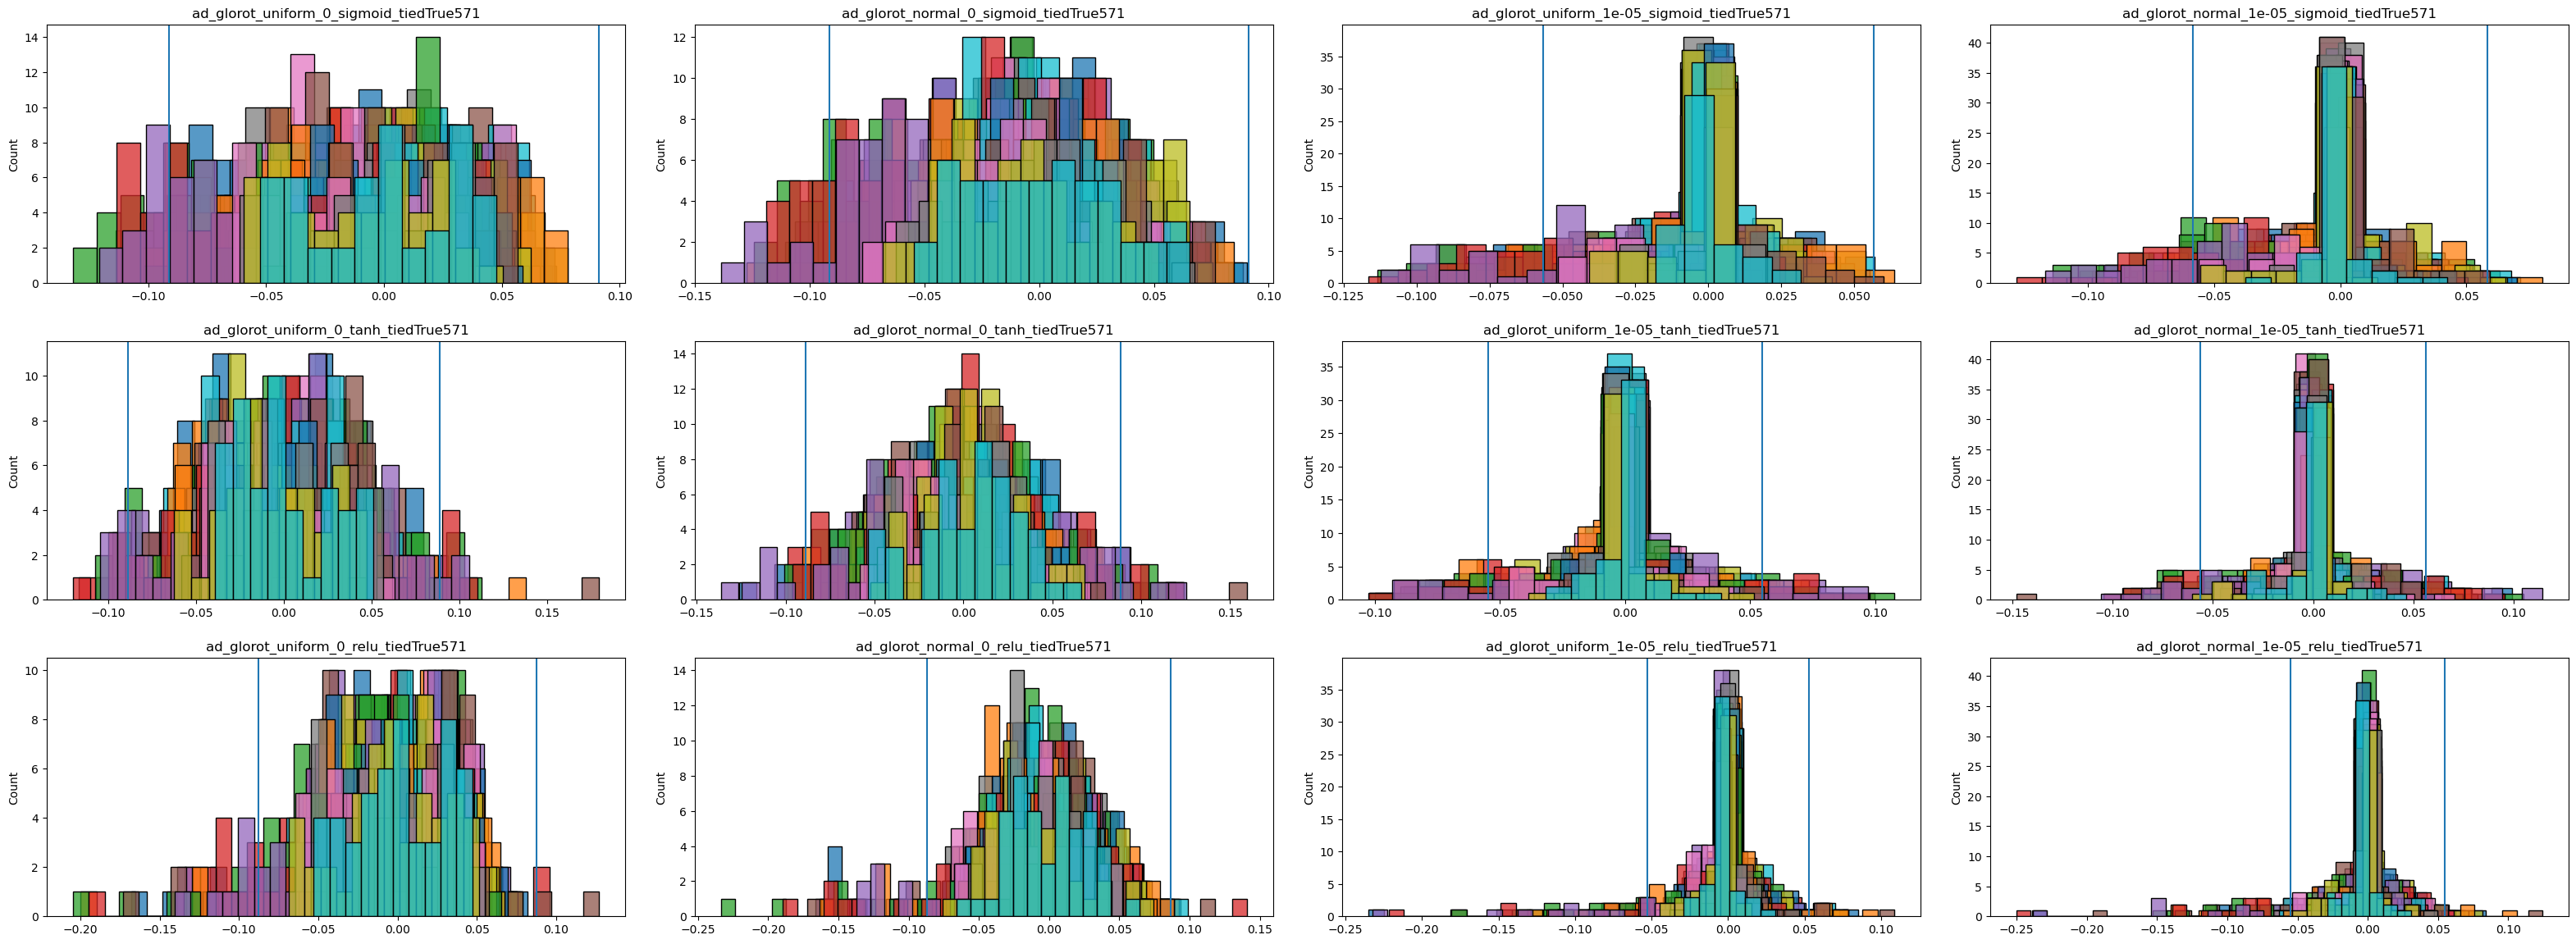

In [35]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

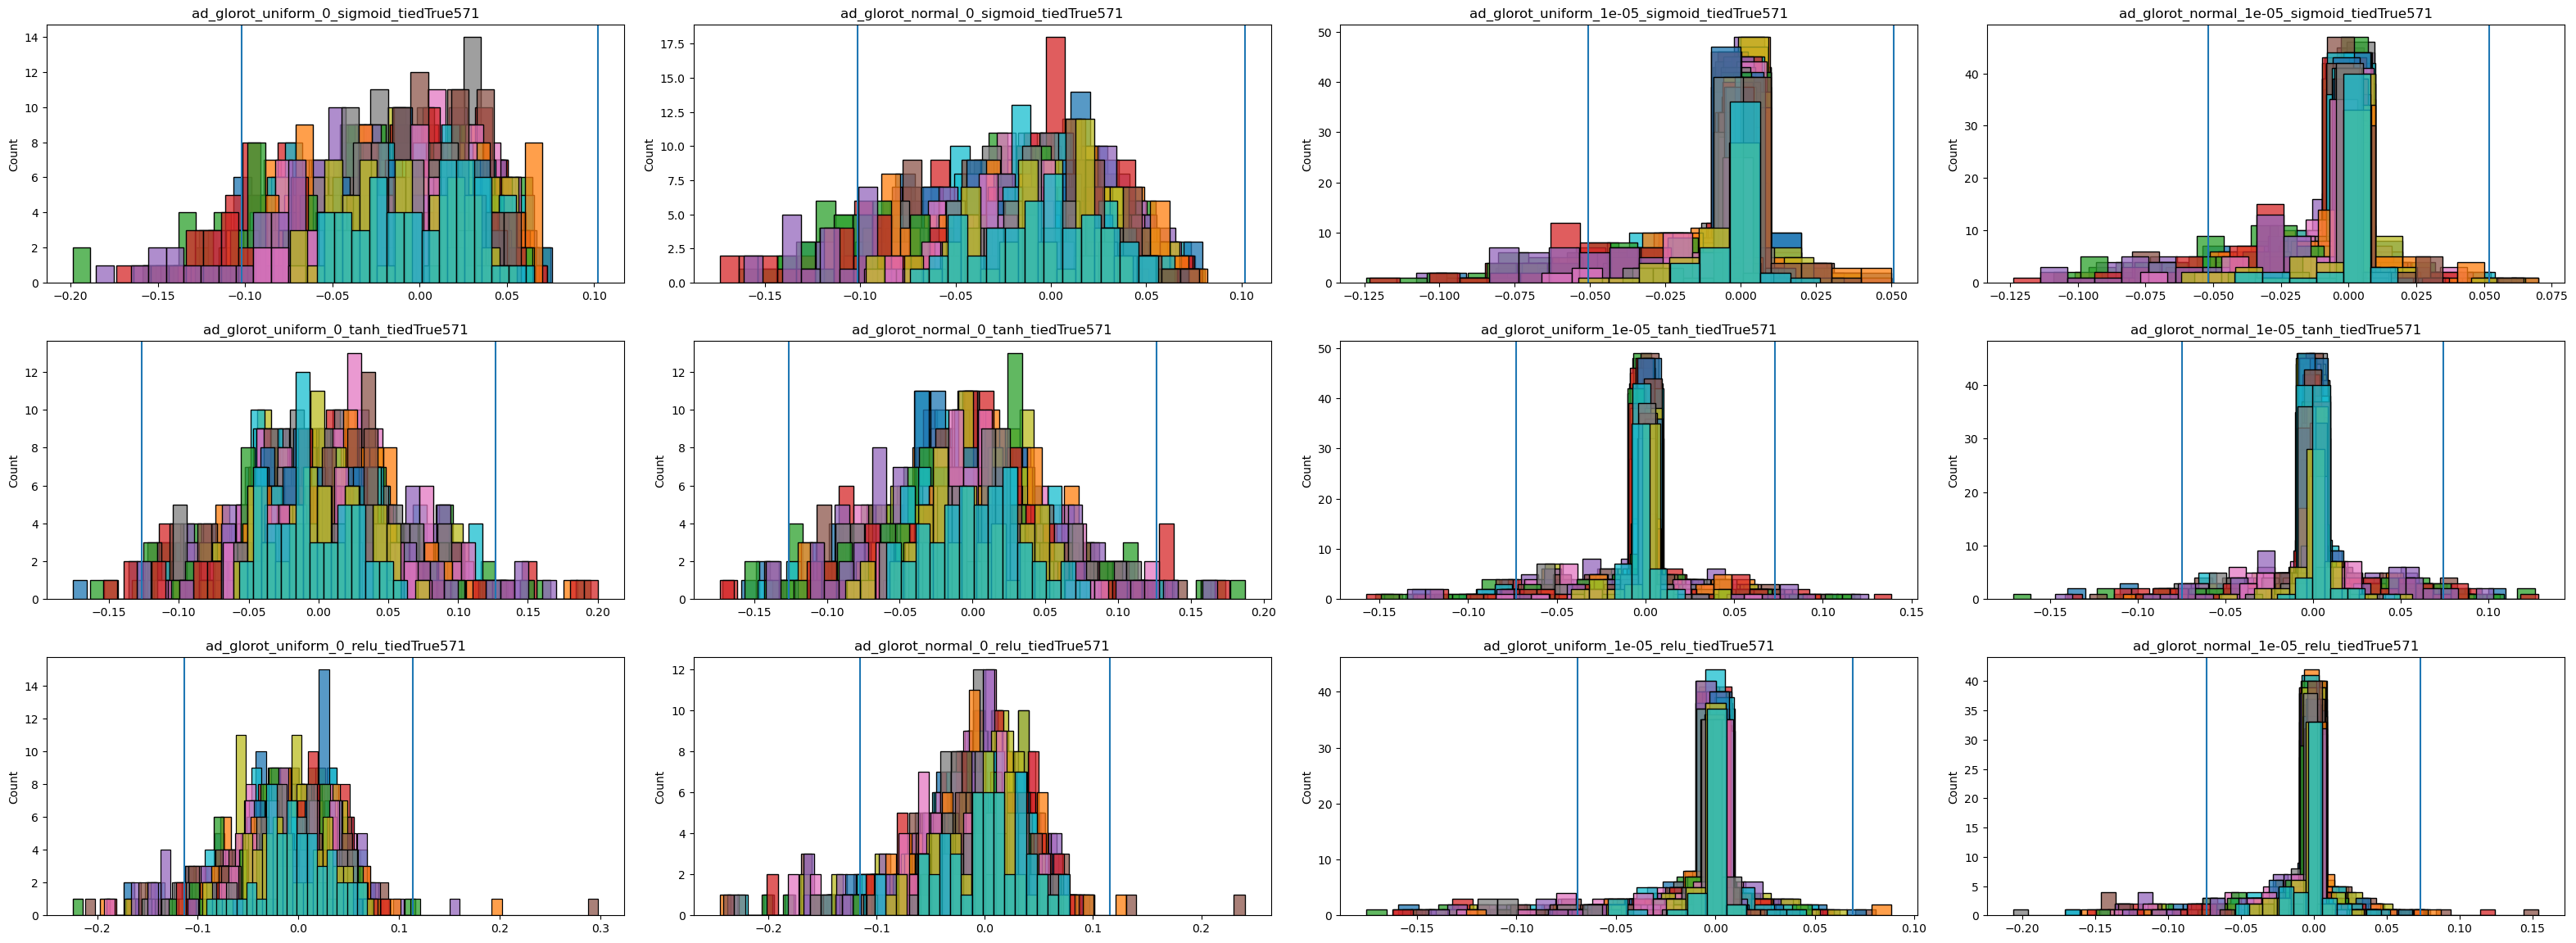

In [37]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


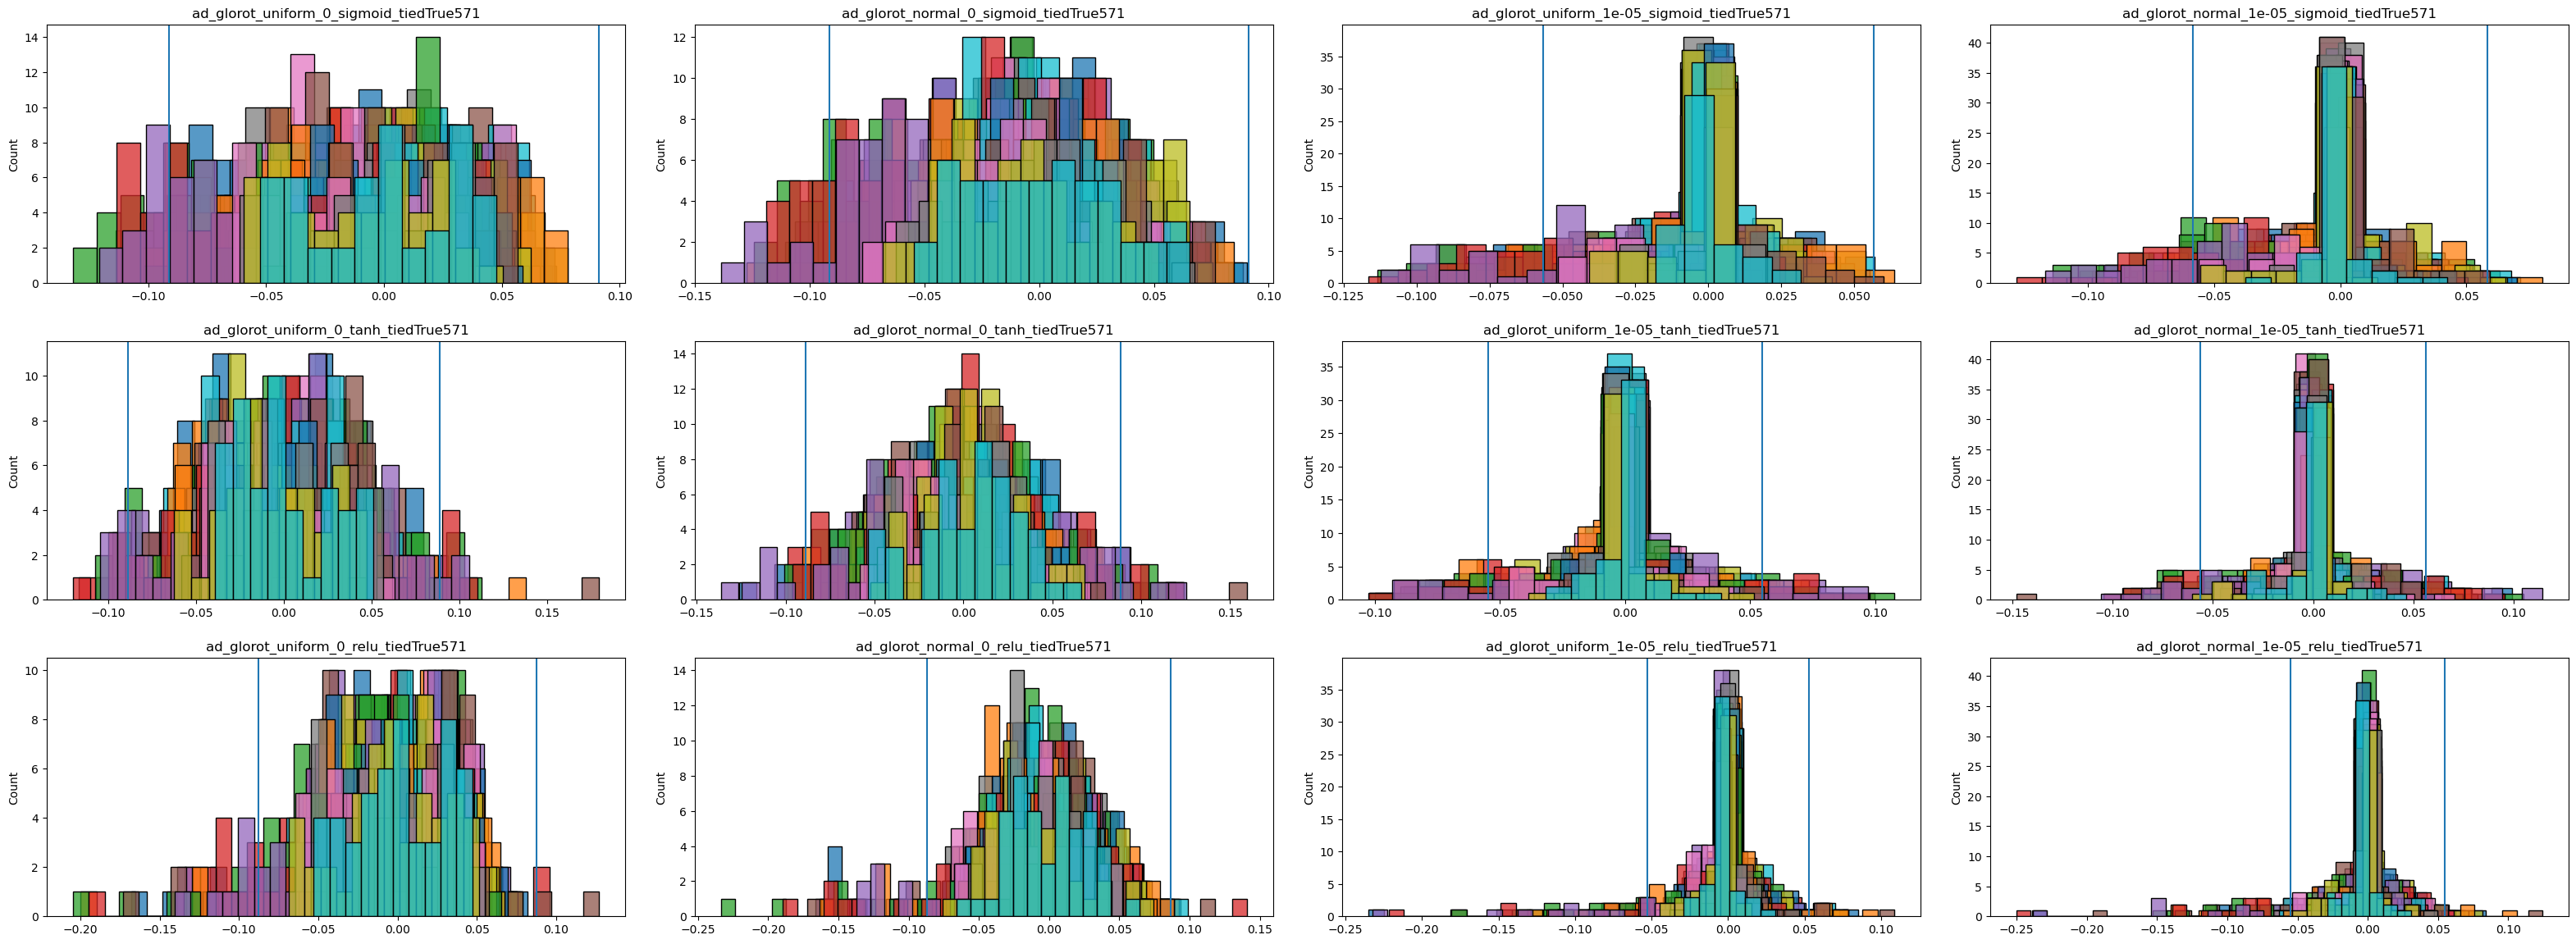

In [38]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


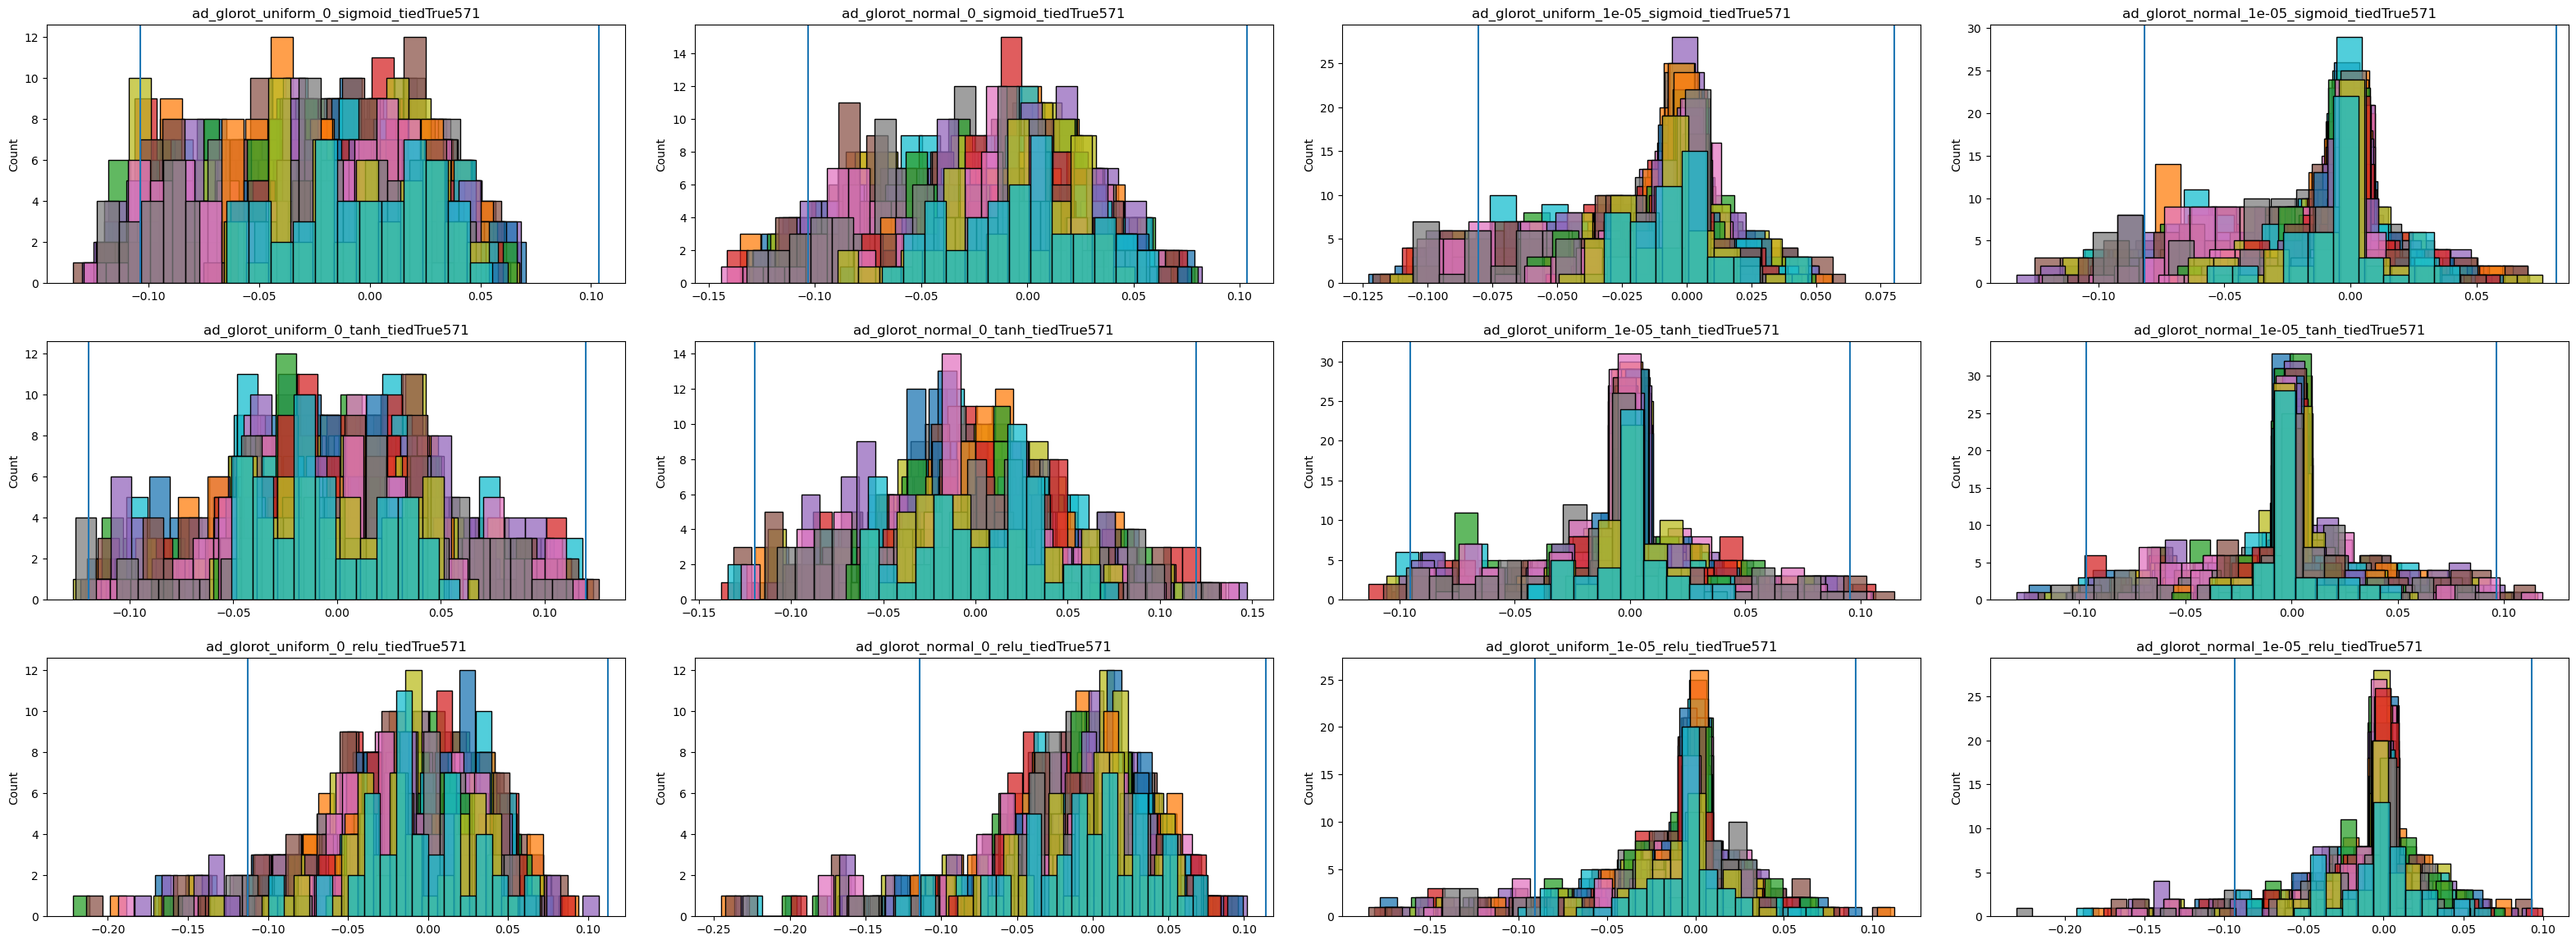

In [39]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_pre[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

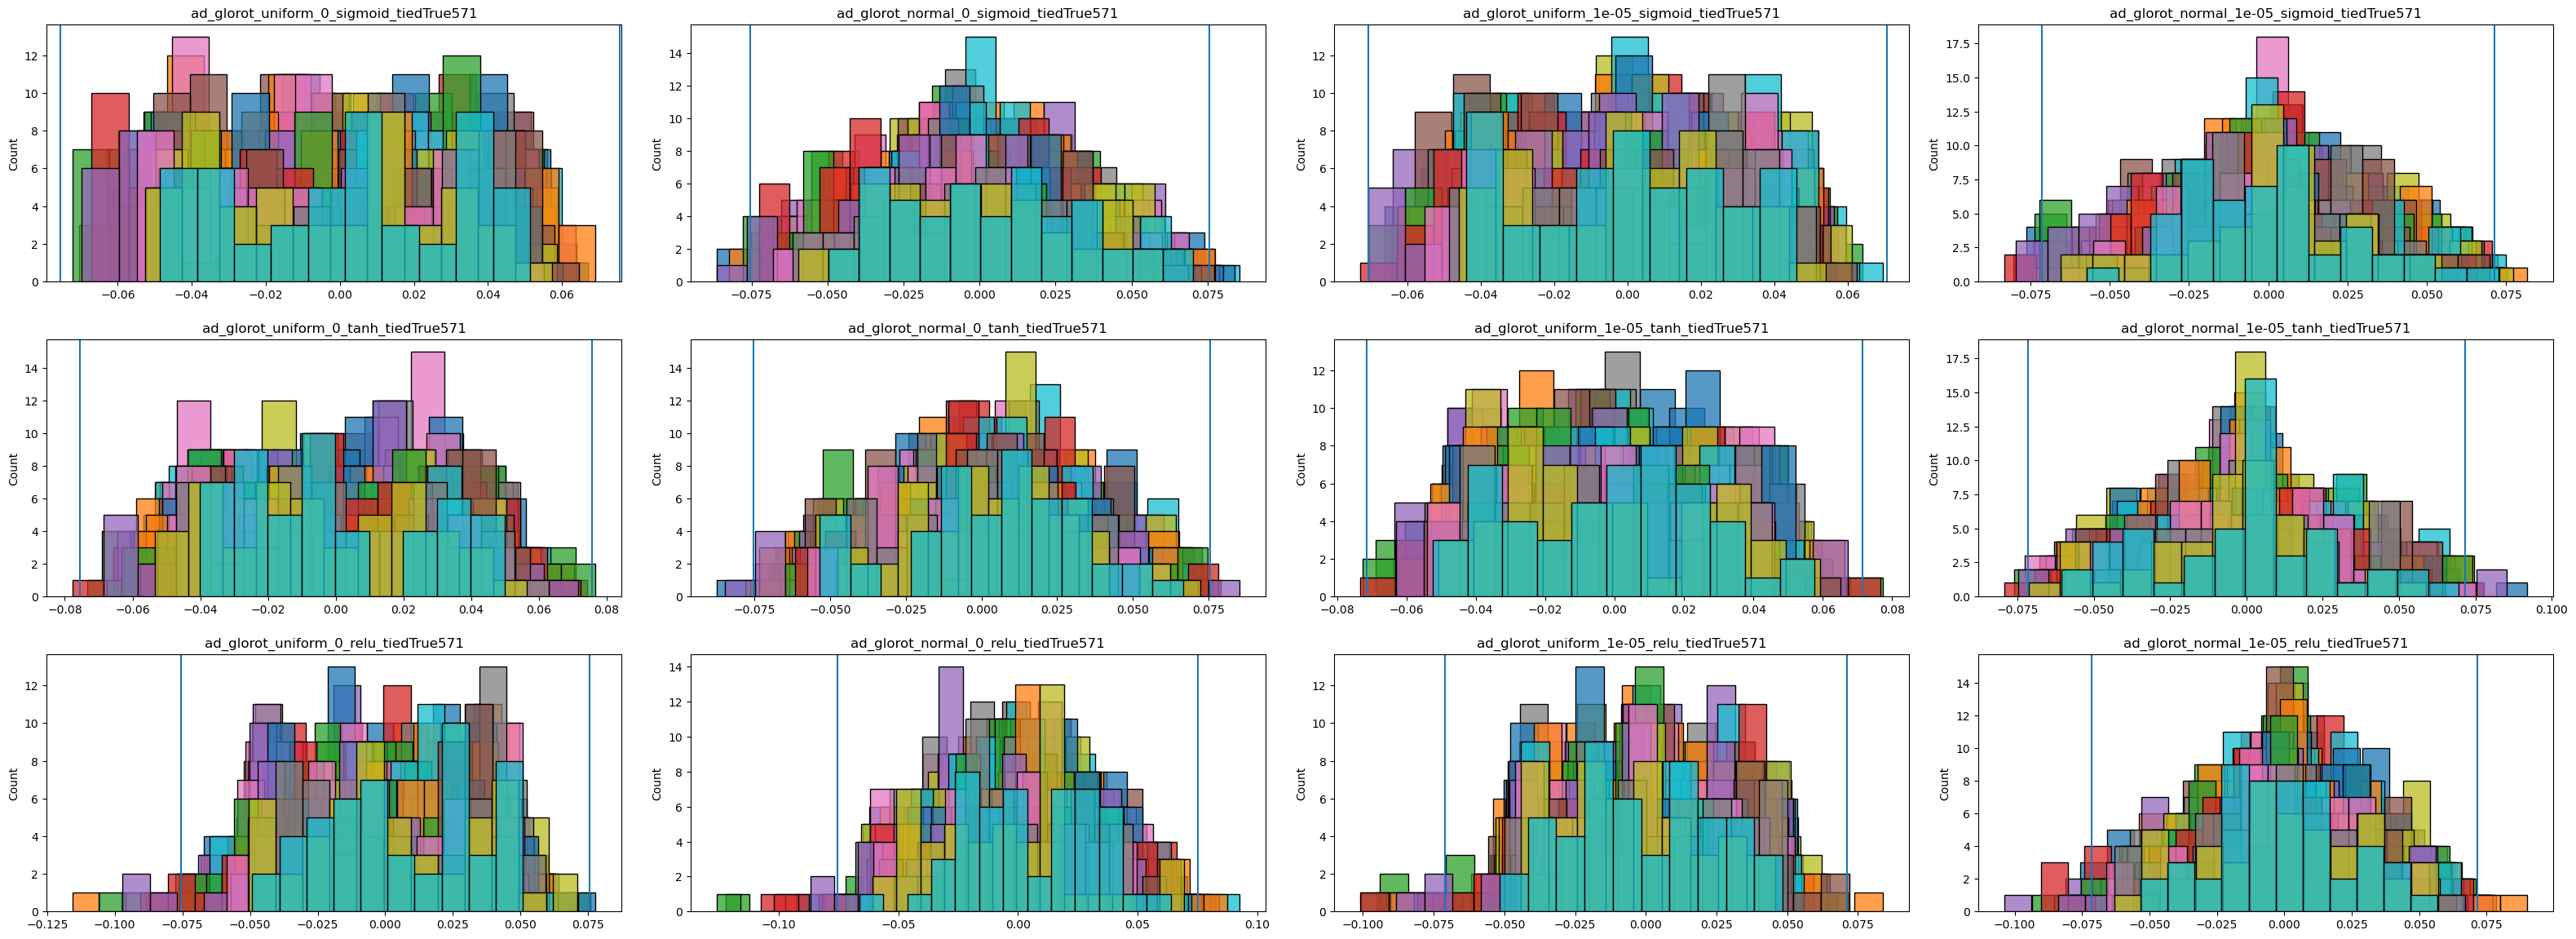

In [40]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_preCTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

In [41]:
model_temp = model_dict_seq2
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 

model_temp = model_dict_seq2CTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2CTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2CTRL[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 


model_temp = model_dict_pre
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_pre[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_pre[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')


model_temp = model_dict_preCTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_preCTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_preCTRL[m].set_kegg('../node_interpretation/se16_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_gl

ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


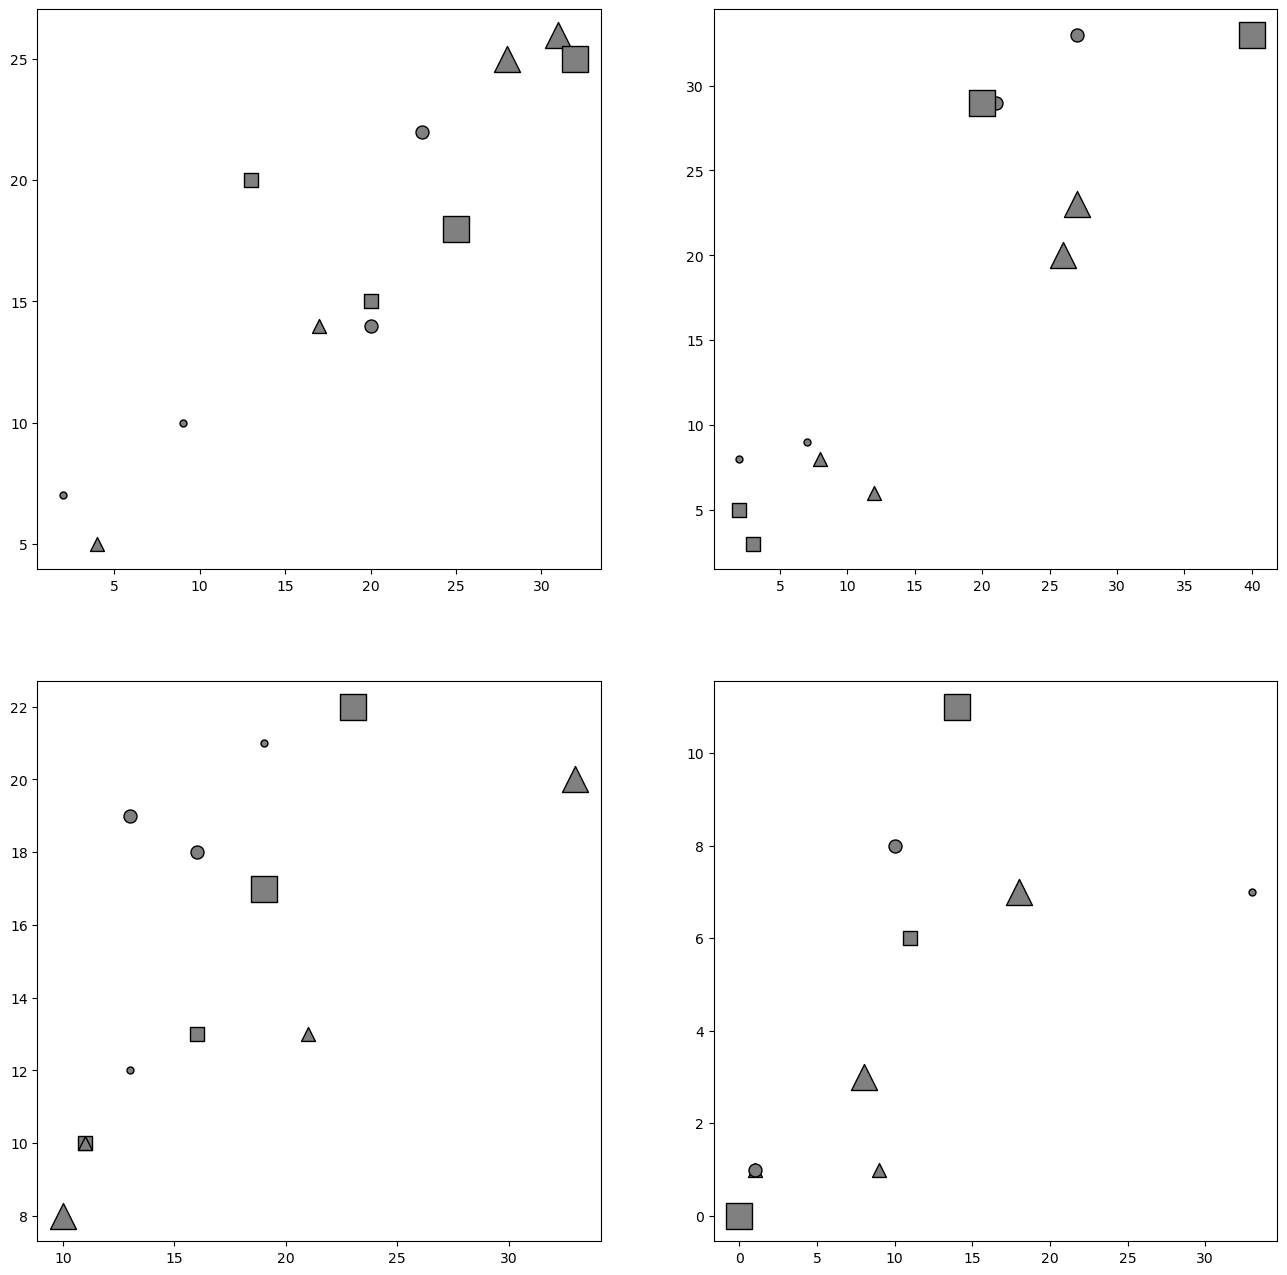

In [42]:


plimk=5
plimg=5
plimr=5
plimo=5
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or unties
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    


ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


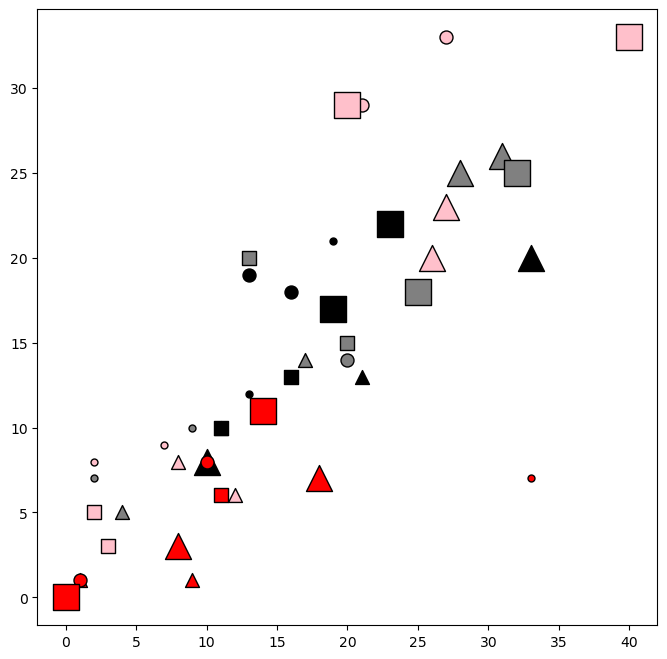

In [43]:

plimk=5
plimg=5
plimr=5
plimo=5
xd=1
yd=1
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or untied
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'grey', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'pink', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'black', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'red', marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    
